In [9]:
import numpy as np
import matplotlib.pyplot as plt

### Q1

In [4]:
y = [1, 4, 9, 14, 25, 36, 49, 64, 81, 100]
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

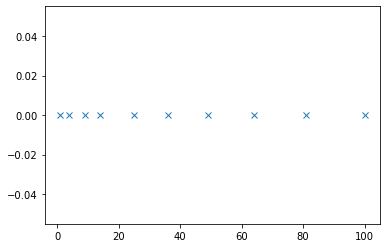

In [64]:
plt.plot(y, np.zeros_like(y), 'x')

### Q2

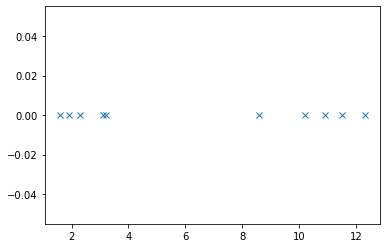

In [22]:
data = np.array([2.3, 3.2, 3.1, 1.6, 1.9, 11.5, 10.2, 12.3, 8.6, 10.9])
plt.plot(data, np.zeros_like(data), 'x')

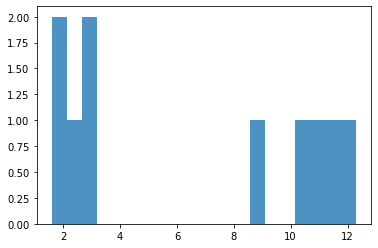

In [17]:
h1 = plt.hist(data, bins=20, histtype='stepfilled', alpha=0.8);

In [28]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [51]:
def bayes(pi_1, pi_2, p_x_k1, p_x_k2):
    return (p_x_k1 * pi_1)/(p_x_k1 * pi_1 + p_x_k2 * pi_2)

In [34]:
pi_1 = 0.5
pi_2 = 0.5

mu1 = 0
mu2 = 0

si1 = 1
si2 = 1

p_x_k1 = [gaussian(x, mu1, si1) for x in data]
p_x_k2 = [gaussian(x, mu2, si2) for x in data]

In [52]:
p_k1_x = [bayes(pi_1=0.5, pi_2=0.5, p_x_k1=p_x_k1[i], p_x_k2=p_x_k2[i]) for i in range(len(data))]
p_k2_x = [bayes(pi_1=0.5, pi_2=0.5, p_x_k2=p_x_k1[i], p_x_k1=p_x_k2[i]) for i in range(len(data))]

In [53]:
p_k1_x, p_k2_x

([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [59]:
s_p_k1_x = sum(p_k1_x)
s_p_k2_x = sum(p_k2_x)

new_mu1 = sum([(p_k1_x[i]*data[i]) for i in range(len(data))])/s_p_k1_x
new_mu2 = sum([(p_k2_x[i]*data[i])  for i in range(len(data))])/s_p_k2_x

new_si1 = sum([p_k1_x[i]*((data[i] - pi_1)**2) for i in range(len(data))])/s_p_k1_x
new_si2 = sum([p_k2_x[i]*((data[i] - pi_2)**2) for i in range(len(data))])/s_p_k2_x

In [60]:
new_mu1, new_mu2, new_si1, new_si2

(6.56, 6.56, 54.85600000000001, 54.85600000000001)

In [61]:
p_x_k1 = [gaussian(x, new_mu1, new_si1) for x in data]
p_x_k2 = [gaussian(x, new_mu2, new_si2) for x in data]

In [62]:
p_x_k1, p_x_k2

([0.9969891694474972,
  0.99812589891464,
  0.9980127978159401,
  0.9959205863795553,
  0.9963982772059434,
  0.9959533520286113,
  0.9978008921421077,
  0.9945404445270782,
  0.9993087551302352,
  0.9968752033212224],
 [0.9969891694474972,
  0.99812589891464,
  0.9980127978159401,
  0.9959205863795553,
  0.9963982772059434,
  0.9959533520286113,
  0.9978008921421077,
  0.9945404445270782,
  0.9993087551302352,
  0.9968752033212224])